In [16]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed

Populating the interactive namespace from numpy and matplotlib


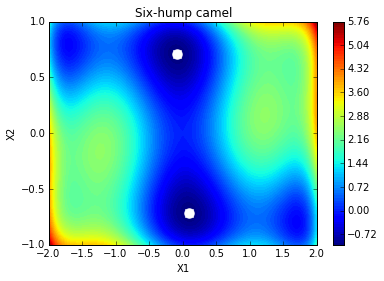

In [17]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel(sd = 0.1)
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

In [18]:
# Creates three identical objects that we will later use to compare the optimization strategies 
myBopt2D = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'deepGP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 0.1)  

** GPyOpt Bayesian Optimization class initialized succesfuly **


In [22]:
# runs the optimization for the three methods
max_iter = 20  # maximum time 40 iterations

myBopt2D.run_optimization(max_iter)

   ** Two equal location selected **


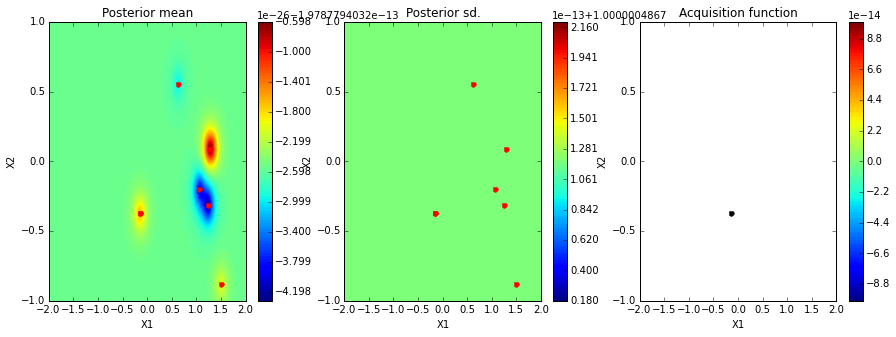

In [23]:
myBopt2D.plot_acquisition()

In [24]:
myBopt2D.model.model.predict(myBopt2D.X)

(array([[ -1.97877940e-13],
        [ -1.97877940e-13],
        [ -1.97877940e-13],
        [ -1.97877940e-13],
        [ -1.97877940e-13],
        [ -1.97877940e-13],
        [ -1.97877940e-13]]), array([[ 1.00000097],
        [ 1.00000097],
        [ 1.00000097],
        [ 1.00000097],
        [ 1.00000097],
        [ 1.00000097],
        [ 1.00000097]]))

In [10]:
myBopt2D.Y

array([[-0.9517939 ],
       [ 0.42853294],
       [-0.39391165],
       [ 0.6729146 ],
       [ 0.27681623],
       [-0.84914355],
       [-0.88084084]])